In [1]:
# ! pip install cdlib

In [2]:
# !pip install cdlib[C]

In [3]:
# pip install git://github.com/GiulioRossetti/cdlib.git

In [4]:
# !pip install  nxviz 

In [5]:
# !pip uninstall wurlitzer

In [6]:
# !pip install wurlitzer

In [7]:
import os
import operator

import pandas as pd
import numpy as np

In [8]:
from matplotlib.pyplot import figure
import infomap
from cdlib import algorithms, evaluation, viz

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'wurlitzer'}


Note: to be able to use all overlapping methods, you need to install some additional packages:  {'ASLPAw'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer'}


In [9]:
import networkx as nx
from cdlib import algorithms, evaluation, viz

In [10]:
edges_df = pd.read_csv("https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s7-edges.csv")
edges_df

,Source,Target,Weight,Season
0,DAENERYS,TYRION,179,7
1,DAENERYS,JON,178,7
2,CERSEI,JAIME,172,7
3,ARYA,SANSA,156,7
4,JON,TYRION,107,7
...,...,...,...,...
407,ROBETT,TORMUND,2,7
408,SAM,STANNIS,2,7
409,TORMUND,WHITE_WALKER,2,7
410,TORMUND,YOHN_ROYCE,2,7


In [11]:
s_nodes = edges_df['Source'].append(edges_df["Target"])
s_nodes = s_nodes.str.lower().drop_duplicates().sort_values()

In [12]:
nodes = s_nodes.to_list()
nodes

['aegon',
 'aerys',
 'alys',
 'arya',
 'balerion',
 'benjen',
 'beric',
 'bran',
 'brienne',
 'bronn',
 'catelyn',
 'cersei',
 'daenerys',
 'davos',
 'dickon',
 'drogo',
 'eddison_tollett',
 'ellaria',
 'euron',
 'gendry',
 'gilly',
 'grey_worm',
 'harrag',
 'high_septon',
 'hot_pie',
 'hound',
 'howland',
 'jaime',
 'jeor',
 'joanna',
 'joffrey',
 'jon',
 'jon_arryn',
 'jorah',
 'little_sam',
 'littlefinger',
 'lyanna',
 'lyanna_mormont',
 'lysa',
 'maester_wolkan',
 'margaery',
 'marwyn',
 'meera',
 'melisandre',
 'missandei',
 'mountain',
 'myrcella',
 'ned',
 'ned_umber',
 'night_king',
 'nymeria',
 'obara',
 'oberyn',
 'olenna',
 'podrick',
 'qhono',
 'qyburn',
 'ramsay',
 'randyll',
 'rhaegar',
 'robb',
 'robert',
 'robett',
 'sam',
 'sansa',
 'shireen',
 'stannis',
 'theon',
 'thoros',
 'tommen',
 'tormund',
 'tycho',
 'tyene',
 'tyrion',
 'tywin',
 'varys',
 'viserys',
 'walder',
 'white_walker',
 'yara',
 'yohn_royce']

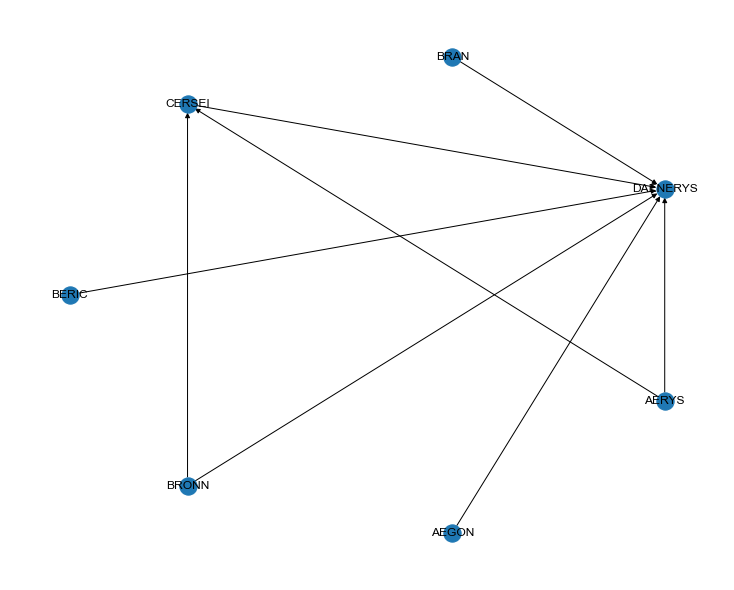

In [13]:
G = nx.from_pandas_edgelist(edges_df, "Source", "Target", create_using=nx.DiGraph(), edge_attr="Weight")
nodes_interest = list(edges_df[edges_df.Target == "DAENERYS"].Source.head(20)) + ["DAENERYS"]
figure(figsize=(10, 8))
nx.draw_shell(G.subgraph(nodes=nodes_interest), with_labels=True)


In [14]:
len(G.nodes)


81

In [15]:
len(G.edges)


412

In [16]:
G.in_degree["ARYA"]

0

In [17]:
G.out_degree["ARYA"]


18

In [18]:
list(G.neighbors(n="ARYA"))

['SANSA',
 'HOT_PIE',
 'LITTLEFINGER',
 'BRAN',
 'BRIENNE',
 'JON',
 'NED',
 'JOFFREY',
 'YOHN_ROYCE',
 'CATELYN',
 'CERSEI',
 'MAESTER_WOLKAN',
 'PODRICK',
 'ROBETT',
 'LYANNA_MORMONT',
 'ROBB',
 'ROBERT',
 'WALDER']

In [19]:
list(G.predecessors(n="ARYA"))

[]

In [20]:
list(G.successors(n="ARYA"))

['SANSA',
 'HOT_PIE',
 'LITTLEFINGER',
 'BRAN',
 'BRIENNE',
 'JON',
 'NED',
 'JOFFREY',
 'YOHN_ROYCE',
 'CATELYN',
 'CERSEI',
 'MAESTER_WOLKAN',
 'PODRICK',
 'ROBETT',
 'LYANNA_MORMONT',
 'ROBB',
 'ROBERT',
 'WALDER']

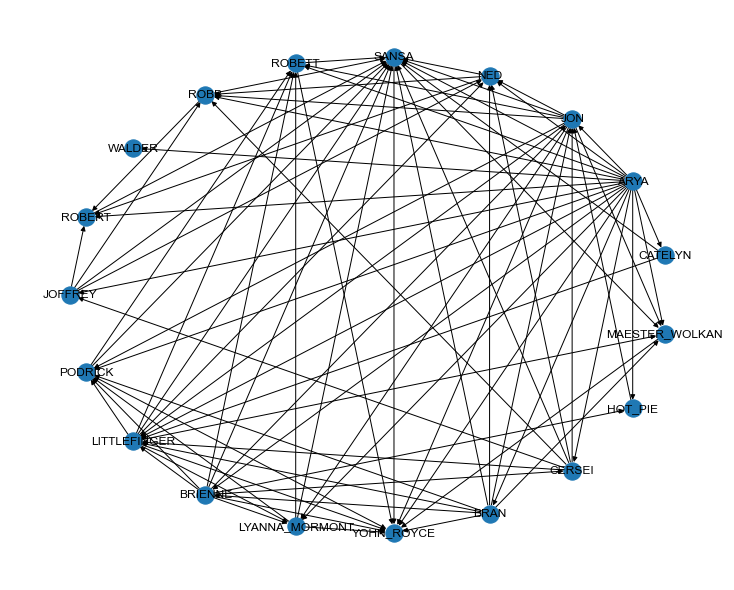

In [21]:
figure(figsize=(10, 8))
nx.draw_shell(G.subgraph(nodes=list(G.successors(n="ARYA")) + ["ARYA"]), with_labels=True)

## Path

In [22]:
list(nx.simple_paths.all_simple_paths(G, source="ARYA", target="DAENERYS"))


[['ARYA', 'BRAN', 'DAENERYS'],
 ['ARYA', 'BRAN', 'BRIENNE', 'BRONN', 'DAENERYS'],
 ['ARYA', 'BRAN', 'BRIENNE', 'BRONN', 'CERSEI', 'DAENERYS'],
 ['ARYA', 'BRAN', 'BRIENNE', 'CERSEI', 'DAENERYS'],
 ['ARYA', 'BRIENNE', 'BRONN', 'DAENERYS'],
 ['ARYA', 'BRIENNE', 'BRONN', 'CERSEI', 'DAENERYS'],
 ['ARYA', 'BRIENNE', 'CERSEI', 'DAENERYS'],
 ['ARYA', 'CERSEI', 'DAENERYS']]

## Shortest path - shortest of all the simple paths (shortest in terms of number of edges)

In [23]:
list(nx.shortest_path(G, source="ARYA", target="DAENERYS"))

['ARYA', 'CERSEI', 'DAENERYS']

In [24]:
nx.shortest_path_length(G, source="ARYA", target="DAENERYS") # number of edges

2

## Node importance (Influencers)

In [25]:
nodes_interest = list(edges_df[edges_df.Target == "DAENERYS"].Source) + ["DAENERYS"]
G_subgraph = G.subgraph(nodes=nodes_interest)
nx.write_gexf(G_subgraph, "got_DAENERYS_network.gexf")

In [26]:
result = nx.degree_centrality(G_subgraph)
sorted_d = sorted(result.items(), key=lambda kv: kv[1],reverse=True)
sorted_d[0]

('DAENERYS', 1.0)

In [27]:
result = nx.betweenness_centrality(G_subgraph)
sorted_d = sorted(result.items(), key=lambda kv: kv[1],reverse=True)
sorted_d[0]

('BERIC', 0.0)

In [28]:
result = nx.closeness_centrality(G_subgraph)
sorted_d = sorted(result.items(), key=lambda kv: kv[1],reverse=True)
sorted_d[0]

('DAENERYS', 1.0)

In [29]:
result = nx.pagerank(G_subgraph)
sorted_d = sorted(result.items(), key=lambda kv: kv[1],reverse=True)
sorted_d[0]

('DAENERYS', 0.4657835091737222)

In [30]:
G = nx.from_pandas_edgelist(df = edges_df, source = "Source", target = "Target", edge_attr = 'Weight', 
                            create_using=nx.MultiGraph())
pos = nx.layout.fruchterman_reingold_layout(G)

In [31]:
coms_edge_betweenness = algorithms.girvan_newman(G, level=4)
coms_edge_betweenness.communities

[['TYWIN',
  'JOANNA',
  'JOFFREY',
  'PODRICK',
  'LITTLEFINGER',
  'TOMMEN',
  'OLENNA',
  'BALERION',
  'TYENE',
  'EDDISON_TOLLETT',
  'OBERYN',
  'WHITE_WALKER',
  'JAIME',
  'BRIENNE',
  'MARGAERY',
  'BERIC',
  'LYANNA_MORMONT',
  'DROGO',
  'RAMSAY',
  'GENDRY',
  'QYBURN',
  'OBARA',
  'ALYS',
  'YOHN_ROYCE',
  'BRAN',
  'CERSEI',
  'ELLARIA',
  'HOWLAND',
  'MOUNTAIN',
  'MELISANDRE',
  'TORMUND',
  'QHONO',
  'VARYS',
  'HOT_PIE',
  'LYSA',
  'YARA',
  'TYCHO',
  'NED_UMBER',
  'DICKON',
  'DAENERYS',
  'GREY_WORM',
  'BENJEN',
  'MAESTER_WOLKAN',
  'CATELYN',
  'RHAEGAR',
  'LYANNA',
  'JORAH',
  'ARYA',
  'RANDYLL',
  'HARRAG',
  'BRONN',
  'MEERA',
  'THOROS',
  'JEOR',
  'JON_ARRYN',
  'TYRION',
  'JON',
  'DAVOS',
  'EURON',
  'NIGHT_KING',
  'THEON',
  'NED',
  'AERYS',
  'SANSA',
  'ROBETT',
  'MYRCELLA',
  'HOUND',
  'MISSANDEI',
  'NYMERIA',
  'ROBB',
  'WALDER',
  'ROBERT'],
 ['GILLY', 'STANNIS', 'LITTLE_SAM', 'SAM', 'HIGH_SEPTON'],
 ['SHIREEN', 'MARWYN'],
 ['AEGON

Community List: [['TYWIN', 'JOANNA', 'JOFFREY', 'PODRICK', 'LITTLEFINGER', 'TOMMEN', 'OLENNA', 'BALERION', 'TYENE', 'EDDISON_TOLLETT', 'OBERYN', 'WHITE_WALKER', 'JAIME', 'BRIENNE', 'MARGAERY', 'BERIC', 'LYANNA_MORMONT', 'DROGO', 'RAMSAY', 'GENDRY', 'QYBURN', 'OBARA', 'ALYS', 'YOHN_ROYCE', 'BRAN', 'CERSEI', 'ELLARIA', 'HOWLAND', 'MOUNTAIN', 'MELISANDRE', 'TORMUND', 'QHONO', 'VARYS', 'HOT_PIE', 'LYSA', 'YARA', 'TYCHO', 'NED_UMBER', 'DICKON', 'DAENERYS', 'GREY_WORM', 'BENJEN', 'MAESTER_WOLKAN', 'CATELYN', 'RHAEGAR', 'LYANNA', 'JORAH', 'ARYA', 'RANDYLL', 'HARRAG', 'BRONN', 'MEERA', 'THOROS', 'JEOR', 'JON_ARRYN', 'TYRION', 'JON', 'DAVOS', 'EURON', 'NIGHT_KING', 'THEON', 'NED', 'AERYS', 'SANSA', 'ROBETT', 'MYRCELLA', 'HOUND', 'MISSANDEI', 'NYMERIA', 'ROBB', 'WALDER', 'ROBERT'], ['GILLY', 'STANNIS', 'LITTLE_SAM', 'SAM', 'HIGH_SEPTON'], ['SHIREEN', 'MARWYN'], ['AEGON'], ['VISERYS']]
Conductance: FitnessResult(min=0.01376720901126408, max=1.0, score=0.6184397163120567, std=0.3746587086771369)
E

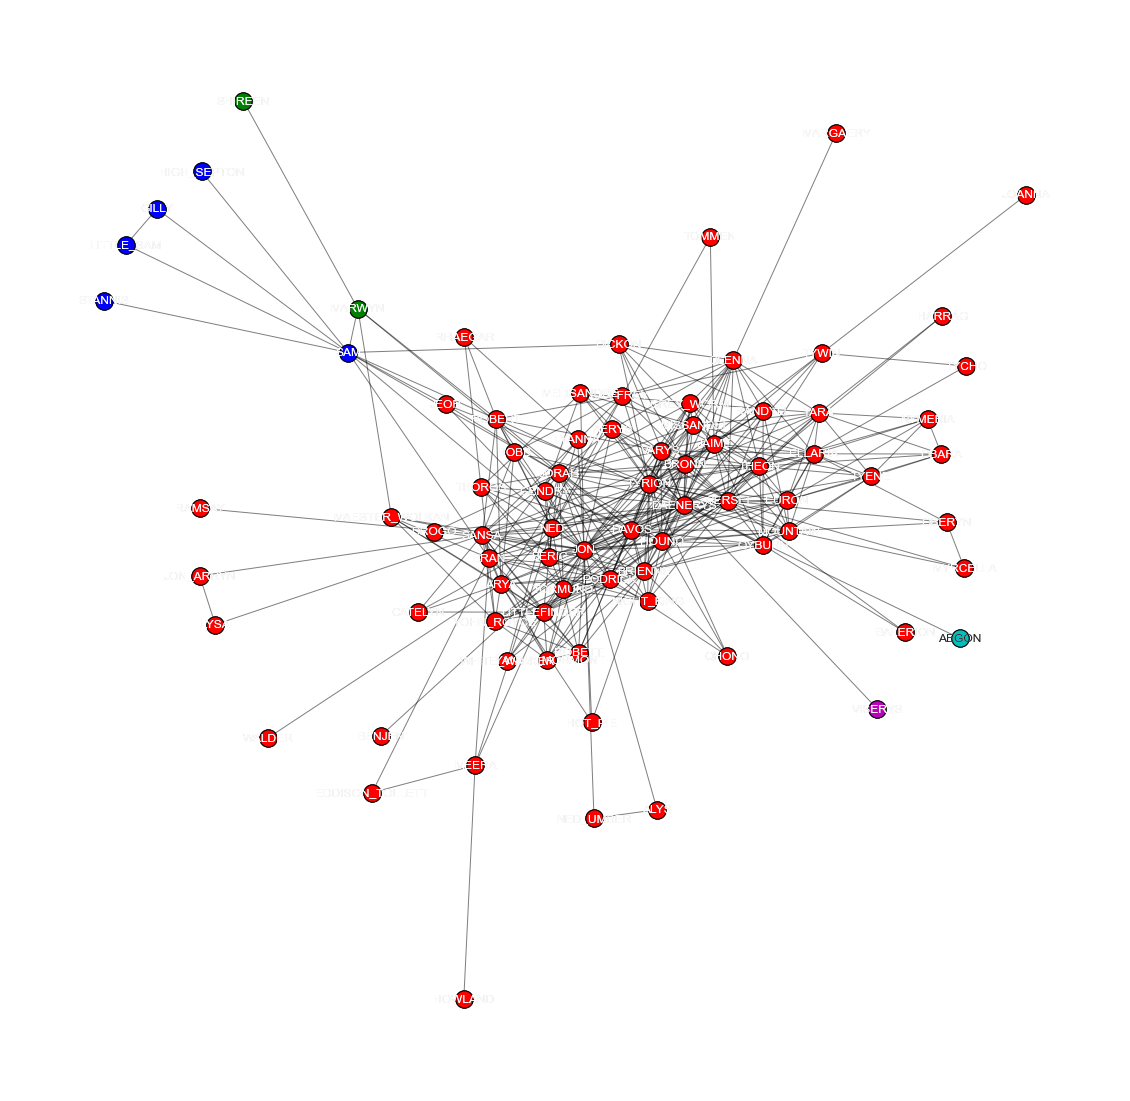

In [32]:
viz.plot_network_clusters(G, coms_edge_betweenness, pos, plot_labels=True, 
                          node_size=300, figsize = (20, 20), plot_overlaps = False)

# nx.draw_networkx_labels(G, pos, labels, font_size=22, font_color="black")
print("Community List: " + str(coms_edge_betweenness.communities))
print("Conductance: " + str(coms_edge_betweenness.conductance()))
print("Expansion: " + str(coms_edge_betweenness.expansion()))
print("Internal Density: " + str(coms_edge_betweenness.internal_edge_density()))

Community List: [['ARYA', 'SANSA', 'LITTLEFINGER', 'BRAN', 'HOT_PIE', 'BRIENNE', 'PODRICK', 'YOHN_ROYCE', 'MEERA', 'NED', 'MAESTER_WOLKAN', 'LYANNA_MORMONT', 'ROBETT', 'LYANNA', 'JOFFREY', 'RHAEGAR', 'ROBERT', 'CATELYN', 'ROBB', 'EDDISON_TOLLETT', 'LYSA', 'TOMMEN', 'RAMSAY', 'WALDER', 'QHONO', 'HOWLAND', 'JON_ARRYN'], ['CERSEI', 'JAIME', 'QYBURN', 'EURON', 'TYCHO', 'THEON', 'MOUNTAIN', 'ELLARIA', 'YARA', 'HARRAG', 'TYENE', 'TYWIN', 'NYMERIA', 'OBARA', 'MYRCELLA', 'OBERYN', 'BALERION', 'JOANNA'], ['JON', 'DAVOS', 'BERIC', 'HOUND', 'JORAH', 'THOROS', 'TORMUND', 'GENDRY', 'NIGHT_KING', 'BENJEN', 'ALYS', 'NED_UMBER', 'JEOR', 'DROGO', 'WHITE_WALKER'], ['DAENERYS', 'TYRION', 'BRONN', 'VARYS', 'OLENNA', 'MISSANDEI', 'RANDYLL', 'GREY_WORM', 'DICKON', 'MELISANDRE', 'AERYS', 'AEGON', 'VISERYS', 'MARGAERY'], ['MARWYN', 'SAM', 'GILLY', 'LITTLE_SAM', 'HIGH_SEPTON', 'SHIREEN', 'STANNIS']]
Conductance: FitnessResult(min=0.3305084745762712, max=0.5469613259668509, score=0.4377887169335355, std=0.08107

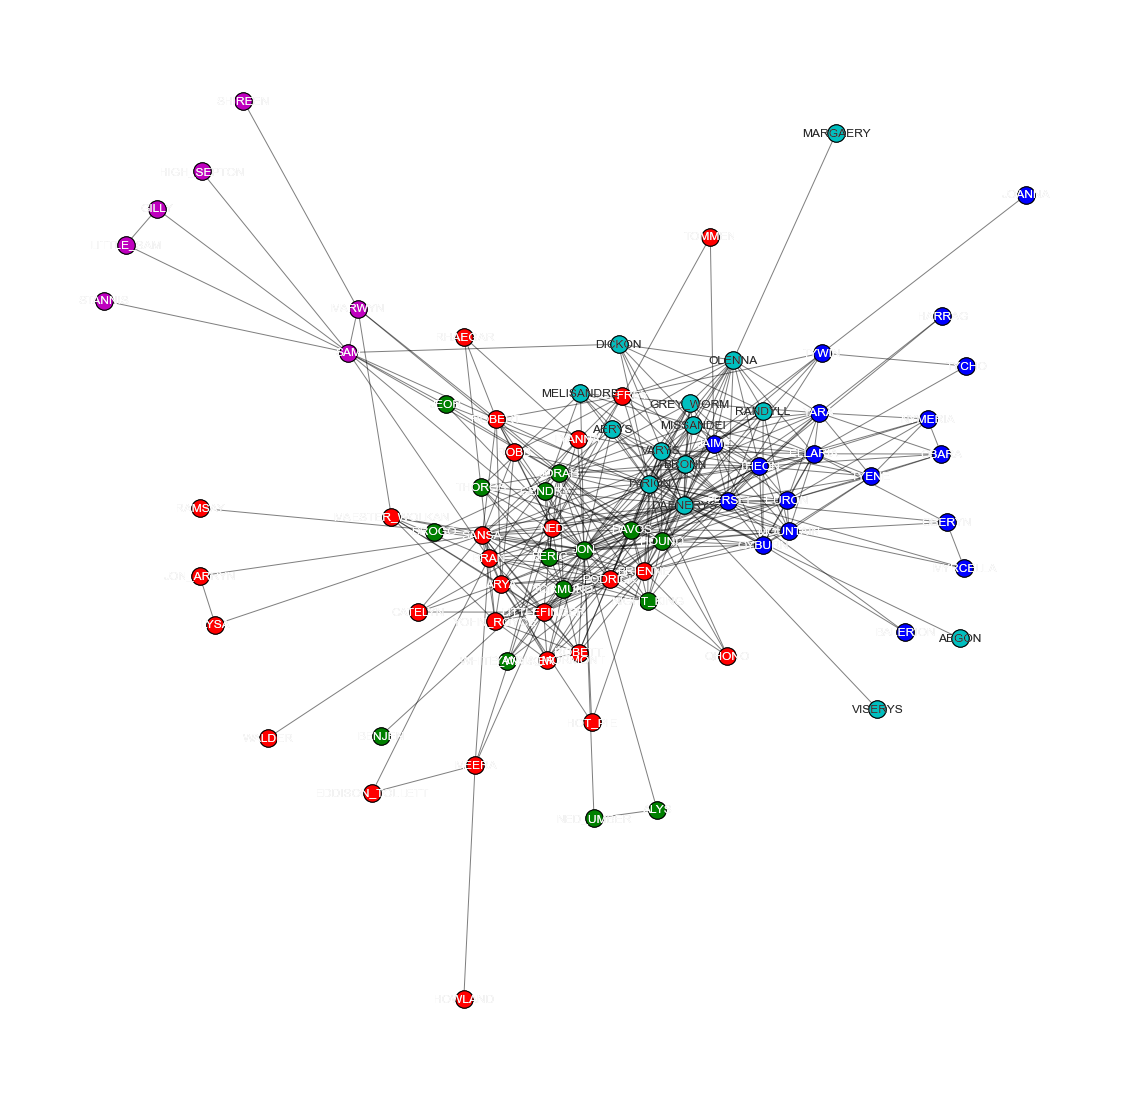

In [33]:
coms_louvain = algorithms.louvain(G, resolution=1)
print("Community List: " + str(coms_louvain.communities))
print("Conductance: " + str(coms_louvain.conductance()))
print("Expansion: " + str(coms_louvain.expansion()))
print("Internal Density: " + str(coms_louvain.internal_edge_density()))
viz.plot_network_clusters(G, coms_louvain, pos, plot_labels=True, node_size=300, figsize = (20, 20), plot_overlaps = False)


In [34]:
coms_infomap = algorithms.infomap(G)
viz.plot_network_clusters(G, coms_infomap, pos, plot_labels=True, node_size=300, figsize = (20, 20), plot_overlaps = False)
print("Community List: " + str(coms_infomap.communities))
print("Conductance: " + str(coms_infomap.conductance()))
print("Expansion: " + str(coms_infomap.expansion()))
print("Internal Density: " + str(coms_infomap.internal_edge_density()))


ModuleNotFoundError: Optional dependency not satisfied: install package wurlitzer to use infomap.